# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [14]:
# CSV dosyasını oku - header=0 ile ilk satırı başlık olarak kullan
iris = pd.read_csv('iris.csv', header=0)

# Sayısal sütunları doğru tipe çevir
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in numeric_columns:
    iris[col] = pd.to_numeric(iris[col], errors='coerce')

# NaN değerleri temizle (başlık satırı veri olarak eklendiyse)
iris = iris.dropna()

# Index'i sıfırla
iris = iris.reset_index(drop=True)

print("İlk 5 satır:")
print(iris.head())

print("\nSon 5 satır:")
print(iris.tail())

İlk 5 satır:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Son 5 satır:
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


## Task 2

In [15]:
# gather basic information
print("\n" + "="*50)
print("VERİ SETİ BİLGİLERİ")
print("="*50)

print("\nVeri setinin şekli (satır, sütun):")
print(iris.shape)

print("\nSütun isimleri:")
print(iris.columns.tolist())

print("\nSütun tipleri:")
print(iris.dtypes)

print("\nGenel bilgi:")
print(iris.info())

print("\nİstatistiksel özet:")
print(iris.describe())

print("\nTür dağılımı:")
print(iris['species'].value_counts())

print("\nEksik değer kontrolü:")
print(iris.isnull().sum())


VERİ SETİ BİLGİLERİ

Veri setinin şekli (satır, sütun):
(150, 5)

Sütun isimleri:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Sütun tipleri:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Genel bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

İstatistiksel özet:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828

## Task 3

In [17]:
# use groupby to look for differences between the species
print("\n" + "="*50)
print("GROUPBY İLE TÜR ANALİZİ")
print("="*50)

# Her tür için ortalama değerler
print("\nTürlere göre ortalama değerler:")
grouped_mean = iris.groupby('species').mean()
print(grouped_mean)

print("\nTürlere göre medyan değerler:")
grouped_median = iris.groupby('species').median()
print(grouped_median)

print("\nTürlere göre standart sapma:")
print(iris.groupby('species').std())

print("\nTürlere göre min-max değerler:")
print(iris.groupby('species').agg(['min', 'max']))

print("\nTürlere göre sayım:")
print(iris.groupby('species').size())


GROUPBY İLE TÜR ANALİZİ

Türlere göre ortalama değerler:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

Türlere göre medyan değerler:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0

Türlere göre standart sapma:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          0.352490     0.381024      0.173511     0.107210
versicolor      0.516171     0.31379

In [18]:
# use sorting to look for differences between the species
print("\n" + "="*50)
print("SIRALAMA İLE ANALİZ")
print("="*50)

print("\nPetal length'e göre sıralama (en küçük 10):")
print(iris.sort_values('petal_length').head(10)[['petal_length', 'petal_width', 'species']])

print("\nPetal length'e göre sıralama (en büyük 10):")
print(iris.sort_values('petal_length', ascending=False).head(10)[['petal_length', 'petal_width', 'species']])

print("\nPetal width'e göre sıralama (en küçük 10):")
print(iris.sort_values('petal_width').head(10)[['petal_width', 'petal_length', 'species']])

print("\nSepal length'e göre sıralama (en büyük 10):")
print(iris.sort_values('sepal_length', ascending=False).head(10)[['sepal_length', 'sepal_width', 'species']])


SIRALAMA İLE ANALİZ

Petal length'e göre sıralama (en küçük 10):
    petal_length  petal_width species
22           1.0          0.2  setosa
13           1.1          0.1  setosa
14           1.2          0.2  setosa
35           1.2          0.2  setosa
16           1.3          0.4  setosa
38           1.3          0.2  setosa
36           1.3          0.2  setosa
2            1.3          0.2  setosa
40           1.3          0.3  setosa
41           1.3          0.3  setosa

Petal length'e göre sıralama (en büyük 10):
     petal_length  petal_width    species
118           6.9          2.3  virginica
117           6.7          2.2  virginica
122           6.7          2.0  virginica
105           6.6          2.1  virginica
131           6.4          2.0  virginica
107           6.3          1.8  virginica
130           6.1          1.9  virginica
109           6.1          2.5  virginica
135           6.1          2.3  virginica
100           6.0          2.5  virginica

Petal wi

In [20]:
# use plotting to look for differences between the species
print("\n" + "="*50)
print("GÖRSELLEŞTİRME")
print("="*50)

# Türleri sayısal değerlere map et (renklendirme için)
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris['species_num'] = iris['species'].map(species_map)
colors = iris['species_num']


GÖRSELLEŞTİRME


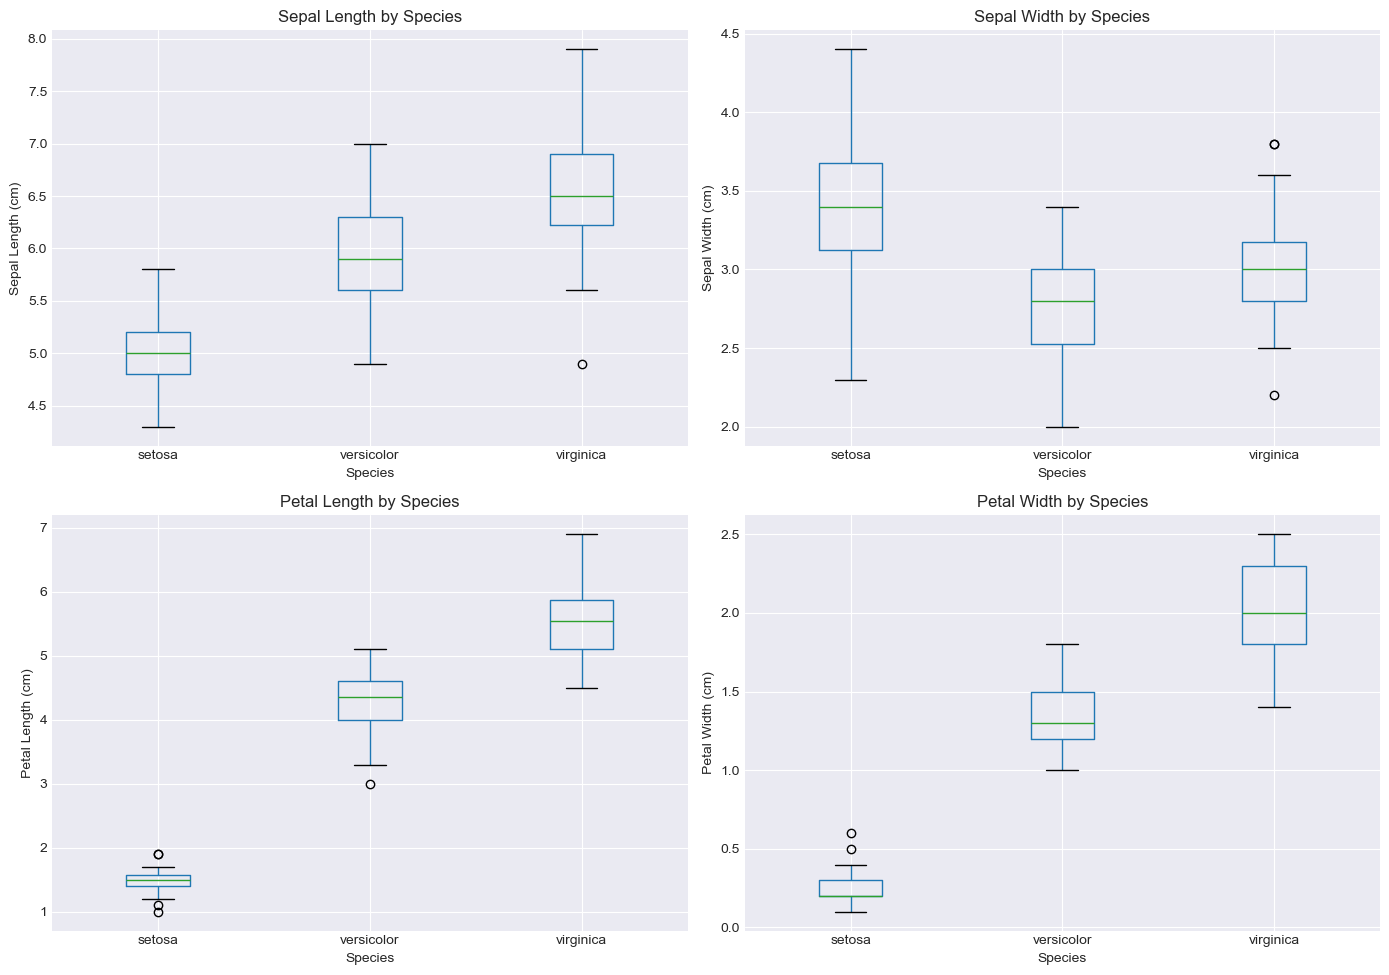

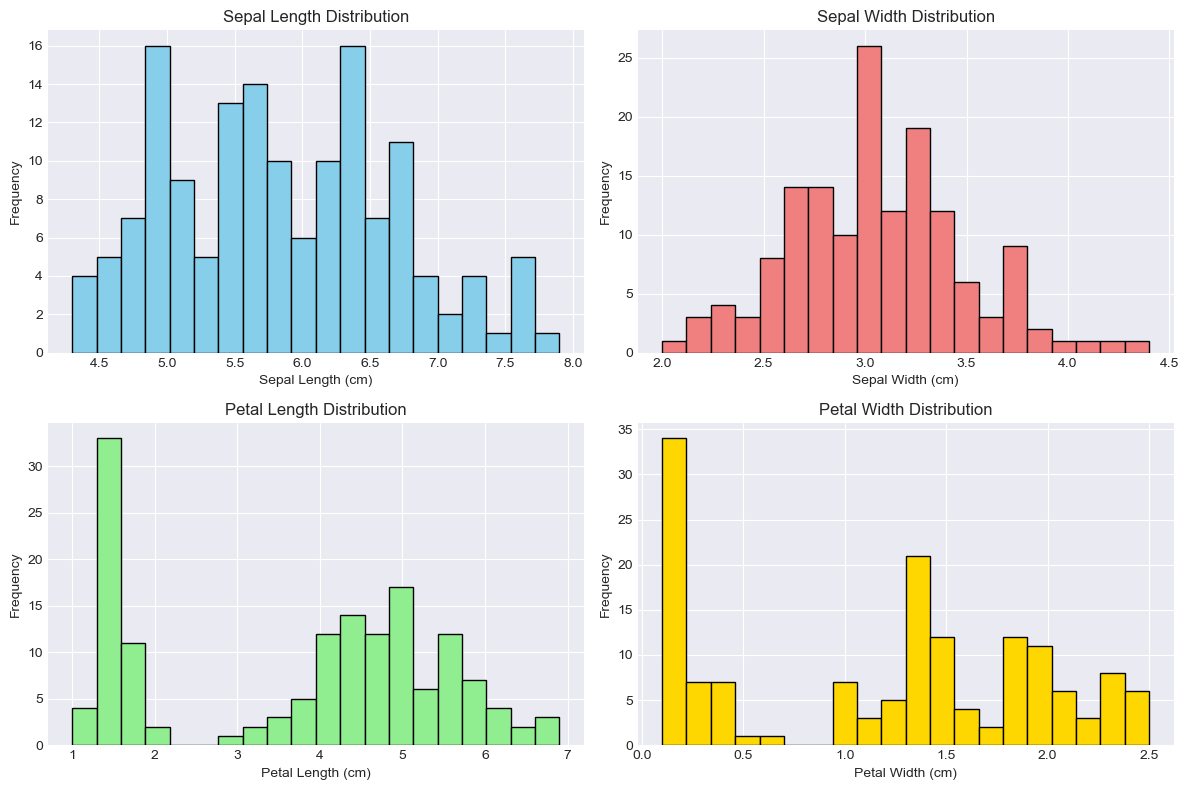

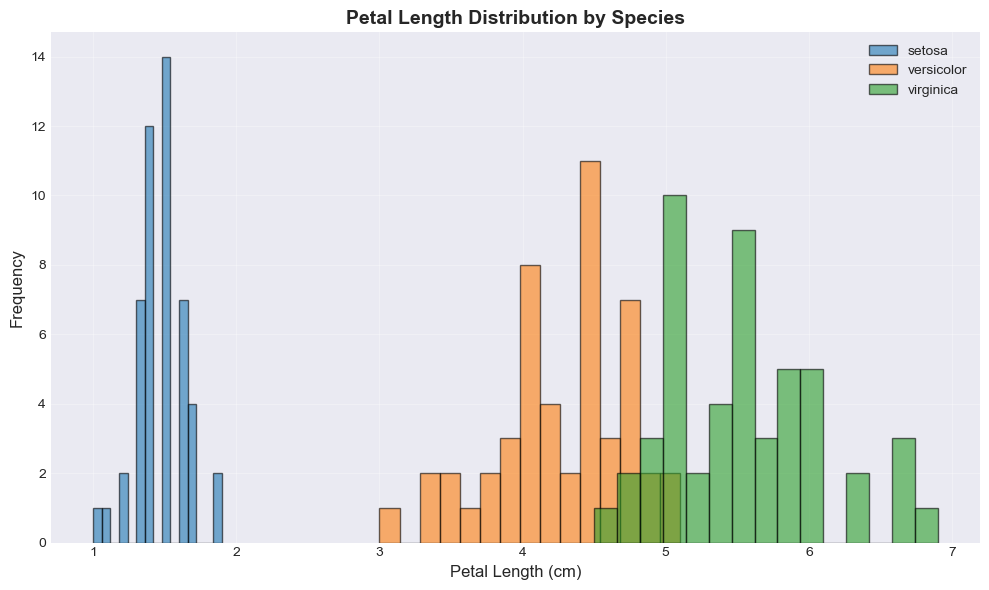

In [28]:
# map species to a numeric value so that plots can be colored by category
# 1. Box plots - Her özellik için
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

iris.boxplot(column='sepal_length', by='species', ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length by Species')
axes[0, 0].set_xlabel('Species')
axes[0, 0].set_ylabel('Sepal Length (cm)')

iris.boxplot(column='sepal_width', by='species', ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width by Species')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Sepal Width (cm)')

iris.boxplot(column='petal_length', by='species', ax=axes[1, 0])
axes[1, 0].set_title('Petal Length by Species')
axes[1, 0].set_xlabel('Species')
axes[1, 0].set_ylabel('Petal Length (cm)')

iris.boxplot(column='petal_width', by='species', ax=axes[1, 1])
axes[1, 1].set_title('Petal Width by Species')
axes[1, 1].set_xlabel('Species')
axes[1, 1].set_ylabel('Petal Width (cm)')

plt.suptitle('')  # Ana başlığı kaldır
plt.tight_layout()
plt.show()

# 2. Histogram - Tüm özellikler için
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].hist(iris['sepal_length'], bins=20, edgecolor='black', color='skyblue')
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Sepal Length Distribution')

axes[0, 1].hist(iris['sepal_width'], bins=20, edgecolor='black', color='lightcoral')
axes[0, 1].set_xlabel('Sepal Width (cm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Sepal Width Distribution')

axes[1, 0].hist(iris['petal_length'], bins=20, edgecolor='black', color='lightgreen')
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Petal Length Distribution')

axes[1, 1].hist(iris['petal_width'], bins=20, edgecolor='black', color='gold')
axes[1, 1].set_xlabel('Petal Width (cm)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Petal Width Distribution')

plt.tight_layout()
plt.show()

# 3. Tür bazlı histogramlar (Petal Length için örnek)
plt.figure(figsize=(10, 6))
for species in iris['species'].unique():
    data = iris[iris['species'] == species]['petal_length']
    plt.hist(data, bins=15, alpha=0.6, label=species, edgecolor='black')
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Petal Length Distribution by Species', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Task 4

In [29]:
print("\n" + "="*50)
print("TÜR TAHMİN KURALLARI")
print("="*50)

print("""
Analizlere göre belirlenen kurallar:

GÖZLEMLER:
1. Iris-setosa diğer türlerden AÇIKÇA ayrılıyor:
   - En küçük petal length (< 2.0 cm)
   - En küçük petal width (< 0.6 cm)
   
2. Iris-versicolor ve Iris-virginica arasında örtüşme var:
   - Ancak Iris-virginica genelde daha büyük petal değerlerine sahip
   
3. Petal özellikleri (length ve width) sepal özelliklerinden ÇOOOK daha ayırt edici!

KURAL SETİ 1 - Petal Length kullanarak (Basit):
  • Eğer petal_length < 2.5 cm  → Iris-setosa
  • Eğer petal_length >= 2.5 ve petal_length < 5.0 cm  → Iris-versicolor
  • Eğer petal_length >= 5.0 cm  → Iris-virginica

KURAL SETİ 2 - Petal Width kullanarak (Daha hassas):
  • Eğer petal_width < 0.8 cm  → Iris-setosa
  • Eğer petal_width >= 0.8 ve petal_width < 1.75 cm  → Iris-versicolor
  • Eğer petal_width >= 1.75 cm  → Iris-virginica

KURAL SETİ 3 - Kombine kural (EN DOĞRU):
  • Eğer petal_length < 2.5  → Iris-setosa
  • Eğer petal_length >= 2.5 VE petal_width < 1.75  → Iris-versicolor
  • Eğer petal_length >= 2.5 VE petal_width >= 1.75  → Iris-virginica
""")


TÜR TAHMİN KURALLARI

Analizlere göre belirlenen kurallar:

GÖZLEMLER:
1. Iris-setosa diğer türlerden AÇIKÇA ayrılıyor:
   - En küçük petal length (< 2.0 cm)
   - En küçük petal width (< 0.6 cm)
   
2. Iris-versicolor ve Iris-virginica arasında örtüşme var:
   - Ancak Iris-virginica genelde daha büyük petal değerlerine sahip
   
3. Petal özellikleri (length ve width) sepal özelliklerinden ÇOOOK daha ayırt edici!

KURAL SETİ 1 - Petal Length kullanarak (Basit):
  • Eğer petal_length < 2.5 cm  → Iris-setosa
  • Eğer petal_length >= 2.5 ve petal_length < 5.0 cm  → Iris-versicolor
  • Eğer petal_length >= 5.0 cm  → Iris-virginica

KURAL SETİ 2 - Petal Width kullanarak (Daha hassas):
  • Eğer petal_width < 0.8 cm  → Iris-setosa
  • Eğer petal_width >= 0.8 ve petal_width < 1.75 cm  → Iris-versicolor
  • Eğer petal_width >= 1.75 cm  → Iris-virginica

KURAL SETİ 3 - Kombine kural (EN DOĞRU):
  • Eğer petal_length < 2.5  → Iris-setosa
  • Eğer petal_length >= 2.5 VE petal_width < 1.75  → Iris-

## Bonus

In [30]:
# define function that accepts a row of data and returns a predicted species
print("\n" + "="*50)
print("BONUS: TAHMİN FONKSİYONU")
print("="*50)

def predict_species(row):
    """
    Bir satırdaki ölçümlere göre iris türünü tahmin eder.
    
    Parametreler:
    -----------
    row : pandas Series veya dictionary
        Ölçüm değerleri (petal_length ve petal_width içermeli)
    
    Dönüş:
    ------
    str : Tahmin edilen tür
    """
    petal_length = row['petal_length']
    petal_width = row['petal_width']
    
    # Kombine kural kullan (en doğru yöntem)
    if petal_length < 2.5:
        return 'setosa'
    elif petal_width < 1.75:
        return 'versicolor'
    else:
        return 'virginica'

# Tüm satırlar için tahmin yap
iris['predicted_species'] = iris.apply(predict_species, axis=1)

# Tahmin doğruluğunu kontrol et
iris['correct'] = iris['species'] == iris['predicted_species']
accuracy = iris['correct'].sum() / len(iris) * 100

print(f"\n✓ Tahmin doğruluğu: {accuracy:.2f}%")
print(f"✓ Doğru tahmin sayısı: {iris['correct'].sum()} / {len(iris)}")

# Yanlış tahminleri göster
print("\n" + "-"*50)
print("YANLIŞ TAHMİNLER:")
print("-"*50)
wrong_predictions = iris[iris['correct'] == False]
if len(wrong_predictions) > 0:
    print(f"\nToplam {len(wrong_predictions)} yanlış tahmin:")
    print(wrong_predictions[['sepal_length', 'sepal_width', 'petal_length', 
                             'petal_width', 'species', 'predicted_species']])
else:
    print("\n🎉 Tüm tahminler doğru!")

# Confusion matrix benzeri özet
print("\n" + "-"*50)
print("KARMAŞIKLIK MATRİSİ (Confusion Matrix):")
print("-"*50)
confusion = pd.crosstab(iris['species'], iris['predicted_species'], 
                        rownames=['Gerçek Tür'], colnames=['Tahmin Edilen'])
print(confusion)

# Her tür için başarı oranı
print("\n" + "-"*50)
print("TÜR BAZLI BAŞARI ORANLARI:")
print("-"*50)
for species in iris['species'].unique():
    species_data = iris[iris['species'] == species]
    correct_predictions = species_data['correct'].sum()
    total = len(species_data)
    accuracy_rate = (correct_predictions / total) * 100
    print(f"{species}: {correct_predictions}/{total} doğru ({accuracy_rate:.1f}%)")

print("\n" + "="*50)
print("ANALİZ TAMAMLANDI!")
print("="*50)


BONUS: TAHMİN FONKSİYONU

✓ Tahmin doğruluğu: 96.00%
✓ Doğru tahmin sayısı: 144 / 150

--------------------------------------------------
YANLIŞ TAHMİNLER:
--------------------------------------------------

Toplam 6 yanlış tahmin:
     sepal_length  sepal_width  petal_length  petal_width     species  \
70            5.9          3.2           4.8          1.8  versicolor   
106           4.9          2.5           4.5          1.7   virginica   
119           6.0          2.2           5.0          1.5   virginica   
129           7.2          3.0           5.8          1.6   virginica   
133           6.3          2.8           5.1          1.5   virginica   
134           6.1          2.6           5.6          1.4   virginica   

    predicted_species  
70          virginica  
106        versicolor  
119        versicolor  
129        versicolor  
133        versicolor  
134        versicolor  

--------------------------------------------------
KARMAŞIKLIK MATRİSİ (Confusion Matr